In [1]:
import os
pyspark_submit_args = '--packages org.mongodb.spark:mongo-spark-connector_2.11:2.4.0 pyspark-shell'
os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
from pyspark.ml.evaluation import ClusteringEvaluator
import math
import time
from matplotlib import pyplot as plt
from pyspark.sql.window import Window 

In [3]:
sparkConf = SparkConf().setMaster("local[3]")\
                       .setAppName("project")\
                       .setAll([('spark.excutor.memory', '14g'),
                                ('spark.executor.cores', '8'),
                                ('spark.cores.max', '12'),
                                ('spark.driver.memory', '14g'),
                                ('spark.driver.maxResultSize', '14g')])
sparkConf.set("spark.mongodb.input.uri", "mongodb://3.88.54.198/nypt.f_15_new")
#sc = SparkContext(conf = sparkConf)

In [4]:
spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config(conf=sparkConf)\
    .getOrCreate()

In [5]:
# origin_col = ["issue_month", "issue_quarter", "issue_weekday", "issue_year", 
#               "plate_type", "plate_type_class", "registration_state", "veh_body_type_class",
#               "veh_color_group", "veh_make_class", "veh_year", "violation_code", "violation_county",
#               "violation_infront_oppos", "violation_precinct", "violation_time"]

# schema = StructType([StructField("_id",StructType([StructField("oid",StringType(),True)]),True)] + 
#     [StructField(c,StringType(),True) for c in origin_col]
#                    )

In [6]:
#case class Character(name: String, age: Int)

In [7]:
df_15 = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [8]:
df_15.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- issue_month: integer (nullable = true)
 |-- issue_quarter: integer (nullable = true)
 |-- issue_weekday: integer (nullable = true)
 |-- issue_year: integer (nullable = true)
 |-- plate_type: string (nullable = true)
 |-- plate_type_class: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- veh_body_type_class: string (nullable = true)
 |-- veh_color_group: string (nullable = true)
 |-- veh_make_class: string (nullable = true)
 |-- veh_year: string (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_infront_oppos: string (nullable = true)
 |-- violation_precinct: integer (nullable = true)
 |-- violation_time: double (nullable = true)



In [9]:
sparkConf.set("spark.mongodb.input.uri", "mongodb://3.88.54.198/nypt.f_16_new")
spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config(conf=sparkConf)\
    .getOrCreate()

In [10]:
df_16 = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [11]:
df_16.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- issue_month: integer (nullable = true)
 |-- issue_quarter: integer (nullable = true)
 |-- issue_weekday: integer (nullable = true)
 |-- issue_year: integer (nullable = true)
 |-- plate_type: string (nullable = true)
 |-- plate_type_class: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- veh_body_type_class: string (nullable = true)
 |-- veh_color_group: string (nullable = true)
 |-- veh_make_class: string (nullable = true)
 |-- veh_year: string (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_infront_oppos: string (nullable = true)
 |-- violation_precinct: double (nullable = true)
 |-- violation_time: double (nullable = true)



In [12]:
sparkConf.set("spark.mongodb.input.uri", "mongodb://3.88.54.198/nypt.f_17_new")
spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config(conf=sparkConf)\
    .getOrCreate()

In [13]:
df_17 = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [14]:
df_17.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- issue_month: integer (nullable = true)
 |-- issue_quarter: integer (nullable = true)
 |-- issue_weekday: integer (nullable = true)
 |-- issue_year: integer (nullable = true)
 |-- plate_type: string (nullable = true)
 |-- plate_type_class: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- veh_body_type_class: string (nullable = true)
 |-- veh_color_group: string (nullable = true)
 |-- veh_make_class: string (nullable = true)
 |-- veh_year: double (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_infront_oppos: string (nullable = true)
 |-- violation_precinct: integer (nullable = true)
 |-- violation_time: double (nullable = true)



In [15]:
sparkConf.set("spark.mongodb.input.uri", "mongodb://3.88.54.198/nypt.f_18_new")
spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config(conf=sparkConf)\
    .getOrCreate()

In [16]:
df_18 = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [17]:
df_18.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- issue_month: integer (nullable = true)
 |-- issue_quarter: integer (nullable = true)
 |-- issue_weekday: integer (nullable = true)
 |-- issue_year: integer (nullable = true)
 |-- plate_type_class: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- veh_body_type_class: string (nullable = true)
 |-- veh_color_group: string (nullable = true)
 |-- veh_make_class: string (nullable = true)
 |-- veh_year: double (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_infront_oppos: string (nullable = true)
 |-- violation_precinct: integer (nullable = true)
 |-- violation_time: double (nullable = true)



In [18]:
df_56 = df_15.union(df_16)
df_567 = df_56.union(df_17)
df_567 = df_567.drop("plate_type")
df = df_567.union(df_18)

In [19]:
df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- issue_month: integer (nullable = true)
 |-- issue_quarter: integer (nullable = true)
 |-- issue_weekday: integer (nullable = true)
 |-- issue_year: integer (nullable = true)
 |-- plate_type_class: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- veh_body_type_class: string (nullable = true)
 |-- veh_color_group: string (nullable = true)
 |-- veh_make_class: string (nullable = true)
 |-- veh_year: string (nullable = true)
 |-- violation_code: integer (nullable = true)
 |-- violation_county: string (nullable = true)
 |-- violation_infront_oppos: string (nullable = true)
 |-- violation_precinct: double (nullable = true)
 |-- violation_time: double (nullable = true)



In [20]:
# parking_code = ["6", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
#                 "21", "22", "23", "24", "27", "32", "35", "37", "38", "39", "40", 
#                 "42", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "55",
#              	"56", "57", "58", "59", "60", "61", "62", "63", "66", "67", "68", "69", "70", 
#                 "71", "72", "73", "74", "75", "76", "77", "78", "80", "82", "83", 
#                 "84", "85", "86", "89", "91", "92", "93", "96", "97", "98", "99"]

parking_code = [6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32,
				35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55,
             	56, 57, 58, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
             	76, 77, 78, 80, 82, 83, 84, 85, 86, 89, 91, 92, 93, 96, 97, 98, 99]

In [21]:
cluster_cols = ['veh_color_group',\
        'issue_month', 'issue_quarter', 'issue_weekday',\
        'registration_state','violation_time',\
        'plate_type_class','veh_body_type_class',\
        'veh_make_class']

local_cols = ['violation_precinct']

In [22]:
df_parking = df.filter(df["violation_code"].isin(parking_code))

In [23]:
# for c in (cluster_cols + local_cols):
#     df.groupBy(
#         df[c]).count().orderBy("count",ascending=False).show()

In [24]:
# when we clean the data, we fill na with -1, so that we need to chagne it
df_nona = df_parking.filter(
    (col("violation_time") < 24) & (col("violation_time")>=0)).persist()

In [25]:
df_model = df_nona.select(cluster_cols)

In [26]:
print(df_model.columns)

['veh_color_group', 'issue_month', 'issue_quarter', 'issue_weekday', 'registration_state', 'violation_time', 'plate_type_class', 'veh_body_type_class', 'veh_make_class']


In [27]:
str_cols = ['veh_color_group',\
        'registration_state',
            'plate_type_class','veh_body_type_class', 'veh_make_class']

In [28]:
df_nona.count()

36566268

In [29]:
def indexStringColumns(df, cols):
    #variable newdf will be updated several times
    newdf = df
    for c in cols:
        #For each given colum, fits StringIndexerModel.
        si = StringIndexer(inputCol=c, outputCol=c+"-num")
        sm = si.fit(newdf)
        newdf = sm.transform(newdf).drop(c)
        newdf = newdf.withColumnRenamed(c+"-num", c)
    
    return newdf

dfnumeric = indexStringColumns(df_model, str_cols)

# 2. one hot encoder to transform categorical data
def oneHotEncodeColumns(df, cols):
    newdf = df
    for c in cols:
        #For each given colum, create OneHotEncoder. 
        onehotenc = OneHotEncoder(inputCol=c, outputCol=c+"-onehot", dropLast=False)
        newdf = onehotenc.transform(newdf).drop(c)
        newdf = newdf.withColumnRenamed(c+"-onehot", c)
    return newdf
    
dfhot = oneHotEncodeColumns(dfnumeric,dfnumeric.columns)

# 3. feature vectors

va = VectorAssembler(outputCol='features',inputCols=dfhot.columns)
df_transformed = va.transform(dfhot).select('features').cache()

In [30]:
df_transformed.count()

36566268

In [31]:
start = time.time()
kmeans = KMeans().setK(10).setSeed(42).setFeaturesCol("features")
model = kmeans.fit(df_transformed)

# Make predictions

#evaluate the kmeans
wssse = model.computeCost(df_transformed) 
time_model = time.time() - start

print("Use K = 10" )
#print("Within Set Sum of Squared Errors = " + str(wssse))
print("Average distance from the center = " + str(math.sqrt(wssse/df_transformed.count())))

Use K = 10
Average distance from the center = 2.12830799234


In [32]:
print(time_model)

356.210639


In [33]:
cost = [0 for x in range(20)]
time_train = [0 for x in range(20)]
for k in range(2,20):
    start = time.time()
    kmeans = KMeans().setK(k).setSeed(42).setFeaturesCol("features")
    model_kmeans = kmeans.fit(df_transformed.sample(False,0.1, seed=42))
    cost[k] = model_kmeans.computeCost(df_transformed)
    time_train[k] = time.time()-start

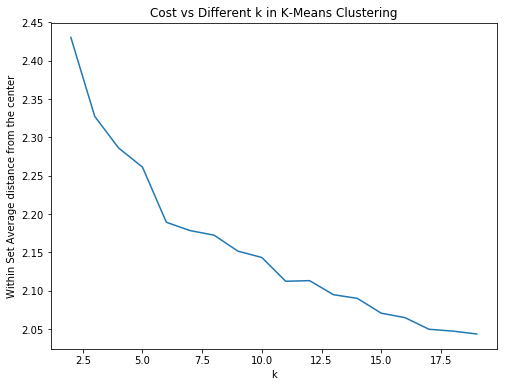

In [34]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),[math.sqrt(c/df_transformed.count()) for c in cost[2:20]])
ax.set_xlabel('k')
ax.set_ylabel('Within Set Average distance from the center')
ax.set_title('Cost vs Different k in K-Means Clustering')
fig.savefig('kmean_m4_xlarge.png')

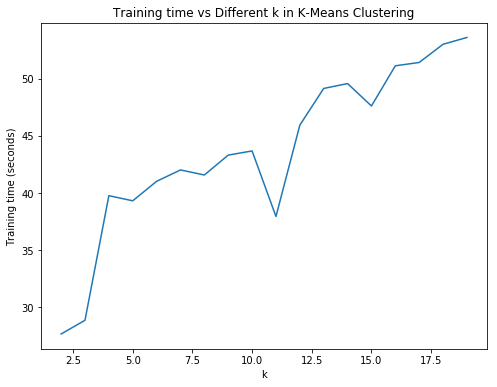

In [35]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),time_train[2:20])
ax.set_xlabel('k')
ax.set_ylabel('Training time (seconds)')
ax.set_title('Training time vs Different k in K-Means Clustering')
fig.savefig('kmean_m4_xlarge_time.png')

In [36]:
## Best_model
start = time.time()
k = 12
kmeans = KMeans(k = k, maxIter = 200, tol = 0.1, seed=42)
model = kmeans.fit(df_transformed)

# Make predictions

#evaluate the kmeans
wssse = model.computeCost(df_transformed) 
time_model = time.time() - start
print("Use K = " + str(k))
#print("Within Set Sum of Squared Errors = " + str(wssse))
best_average_dist = math.sqrt(wssse/df_transformed.count())
print("Average distance from the center = " + str(best_average_dist))
best_model_time = time.time() - start

Use K = 12
Average distance from the center = 2.11827445572


In [37]:
print(best_model_time)

245.010132074


In [38]:
transformed = model.transform(df_transformed)

In [39]:
from pyspark.sql.window import Window as W

df_nona = df_nona.withColumn("idx", monotonically_increasing_id())
windowSpec = W.orderBy("idx")
df_nona = df_nona.withColumn("idx", row_number().over(windowSpec))

transformed = transformed.withColumn("idx", monotonically_increasing_id())
windowSpec = W.orderBy("idx")
transformed = transformed.withColumn("idx", row_number().over(windowSpec))

# now, we can join the dataframes
df_final = df_nona.join(transformed.select(['prediction', "idx"]), 
                        df_nona.idx == transformed.idx, how = "left").persist()

In [40]:
df_final.groupby("prediction").count().orderBy("count",ascending=False).show()

+----------+-------+
|prediction|  count|
+----------+-------+
|         5|6437014|
|         7|4450924|
|        11|3988175|
|         2|3282761|
|         0|3273558|
|        10|2980835|
|         4|2700030|
|         1|2329883|
|         6|2074892|
|         8|1933783|
|         3|1686722|
|         9|1427691|
+----------+-------+



# Top5 Precinct to aviod for group 5, 7 and 11

In [46]:
df_final.filter("prediction == 5").groupby(
    "violation_precinct").count().orderBy(
    "count",ascending=False).show(5)

+------------------+------+
|violation_precinct| count|
+------------------+------+
|              19.0|839533|
|              14.0|538072|
|               1.0|520636|
|              18.0|486202|
|              13.0|357687|
+------------------+------+
only showing top 5 rows



In [47]:
df_final.filter("prediction == 7").groupby(
    "violation_precinct").count().orderBy(
    "count",ascending=False).show(5)

+------------------+------+
|violation_precinct| count|
+------------------+------+
|             114.0|184862|
|              19.0|171746|
|             109.0|133710|
|              70.0|119893|
|             115.0|105754|
+------------------+------+
only showing top 5 rows



In [49]:
df_final.filter("prediction == 11").groupby(
    "violation_precinct").count().orderBy(
    "count",ascending=False).show(5)

+------------------+------+
|violation_precinct| count|
+------------------+------+
|             114.0|156834|
|              19.0|137674|
|             109.0|114345|
|              70.0|111409|
|              61.0| 93718|
+------------------+------+
only showing top 5 rows



In [50]:
with open("results.txt", "w") as f:
    f.write("K=10, time:" + str(time_model))
    f.write("\n")
    f.write("best_model_time:" + str(best_model_time) + '\n')
    f.write("best_average_dist:" + str(best_average_dist))